In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanerzer","key":"6a738120362e1d0ee8a395b5fc9a6333"}'}

In [3]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 May  9 16:04 kaggle.json


In [37]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 95% 220M/232M [00:02<00:00, 101MB/s]
100% 232M/232M [00:02<00:00, 107MB/s]


In [38]:
!ls

crop_part1  kaggle.json  UTKFace		  utk-face-cropped.zip
drive	    sample_data  utkface_aligned_cropped  utkface-new.zip


In [ ]:
!unzip utk-face-cropped.zip

In [40]:
!ls

crop_part1  kaggle.json  utkcropped  utkface_aligned_cropped  utkface-new.zip
drive	    sample_data  UTKFace     utk-face-cropped.zip


In [77]:
import numpy as np
import pandas as pd
import os
import cv2

wd = os.getcwd()
path = os.path.join(wd, "utkcropped/utkcropped")
files = os.listdir(path)
size = len(files)
print("Veri sayisi", size)

Veri sayisi 23709


In [78]:
ırk = [i.split('_')[2] for i in files]

In [120]:
values, counts = np.unique(ırk, return_counts=True)
print(values)

['0' '1' '2' '3' '4']


In [117]:
"""say=0
for i in ırk:
  say=say+1
  if i=="20170109150557335.jpg.chip.jpg":
     print(say)
 """    

'say=0\nfor i in ırk:\n  say=say+1\n  if i=="20170109150557335.jpg.chip.jpg":\n     print(say)\n '

In [118]:
#ırk[1893]

In [119]:
#ırk[1893]="1"

In [123]:
classes = []
for i in ırk:
    i = int(i)
    if i == 0:
        classes.append(0)
    if i == 1:
        classes.append(1)
    if i == 2:
        classes.append(2)
    if i == 3:
        classes.append(3)
    if i== 4 :
        classes.append(4)           

In [124]:
len(classes)

23709

In [149]:
values, counts = np.unique(classes, return_counts=True)
print(counts)

[10078  4530  3434  3975  1692]


In [125]:
from keras.utils.np_utils import to_categorical

In [127]:
ırk_categorical_labels = to_categorical(classes, num_classes=5)
ırk_categorical_labels[:5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

In [129]:
x_data=np.array(images)
x_data.shape

(23709, 64, 64, 3)

In [130]:
x = np.squeeze(x_data)
x = x.astype('float32')
x /= 255
x.shape

(23709, 64, 64, 3)

In [131]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_valid, y_train, y_test = train_test_split(x, age_categorical_labels, test_size=0.3)
X_valid , X_test, y_valid, y_test = train_test_split(X_valid, y_test, test_size=0.5)

In [135]:
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("X_test", X_test.shape)

X_train (16596, 64, 64, 3)
X_valid (3556, 64, 64, 3)
X_test (3557, 64, 64, 3)


In [136]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [137]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.utils import np_utils
from keras_preprocessing import image
from keras.callbacks import ModelCheckpoint

In [138]:
model= Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation("softmax")) #sınıflama işlemi 

#optimazyon basarım metrikleri
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary() #modelin özeti

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [139]:
root="/gdrive/My Drive/Kaggle/"

In [140]:
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/ırk_face_model.h5', verbose=1, save_best_only=True)

epochs = 50
batchSize = 100 

# modeli çalıştır
hist = model.fit(X_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(X_valid, y_valid),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/ırk_face_model.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/50
166/166 - 91s - loss: 1.4028 - accuracy: 0.4506 - val_loss: 1.2851 - val_accuracy: 0.5141

Epoch 00001: val_loss improved from inf to 1.28514, saving model to /gdrive/My Drive/Kaggle/data/ırk_face_model.h5
Epoch 2/50
166/166 - 92s - loss: 1.1470 - accuracy: 0.5648 - val_loss: 1.0362 - val_accuracy: 0.6594

Epoch 00002: val_loss improved from 1.28514 to 1.03620, saving model to /gdrive/My Drive/Kaggle/data/ırk_face_model.h5
Epoch 3/50
166/166 - 93s - loss: 1.0025 - accuracy: 0.6353 - val_loss: 0.8738 - val_accuracy: 0.6867

Epoch 00003: val_loss improved from 1.03620 to 0.87381, saving model to /gdrive/My Drive/Kaggle/data/ırk_face_model.h5
Epoch 4/50
166/166 - 93s - loss: 0.9227 - accuracy: 0.6682 - val_loss: 0.8200 - val_accuracy: 0.7171

Epoch 00004: val_loss improved from 0.87381 to 0.82002, saving model to /gdrive/My Drive/Kaggle/data/ırk_face_model.h5
Epoch 5/50
166/166 - 92s - loss: 0.8652 - accuracy: 0.6928 - val_loss: 0.7937 - val_accuracy: 0.7191

Epoch 00005: val_l

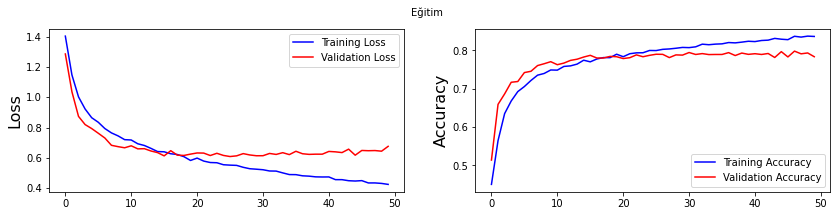

In [141]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


In [142]:
loss,acc = model.evaluate(X_test,  y_test, verbose=2)
print("başarım oranı: {:5.2f}%".format(100*acc))

112/112 - 4s - loss: 0.7261 - accuracy: 0.7813
başarım oranı: 78.13%


In [143]:
labels =["Beyaz","Siyah","Asyalı","Hintli","Diğer"]
import matplotlib.pyplot as plt

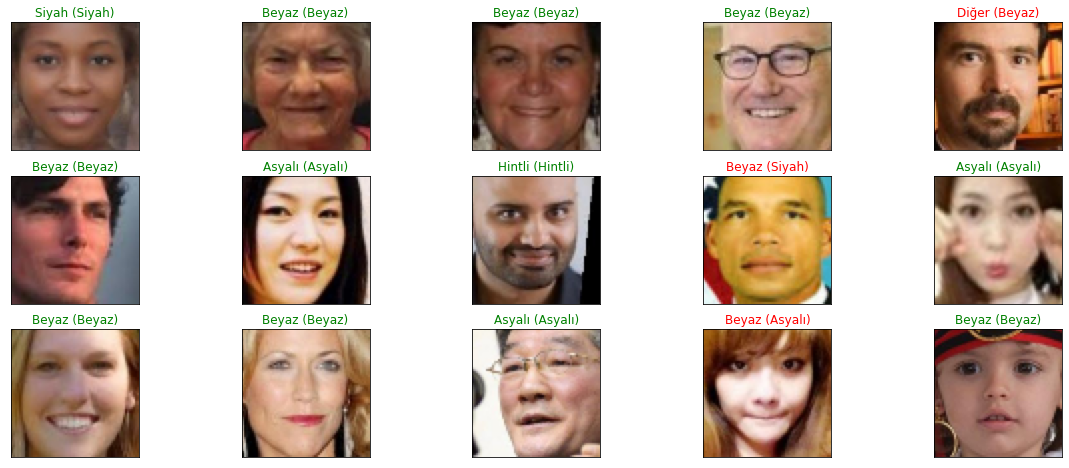

In [147]:
Y = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [146]:
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image

model_json = model.to_json()
with open("ırkModel1.json",'w') as json_file:
  json_file.write(model_json)

model.save('ırkModel1.h5')